In [1]:
import pandas as pd
# import df
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')
df = pd.read_csv('df.csv')
df.head()

,Year-Month,Outbreaks,Price,bacon price,potato price,soybean price,wheat price,corn price,Christmas,Thanksgiving,Passover/Easter,gas price
0,2022-02,8,2.005,7.097,0.802,15.885375,390.50,6.500600,False,False,False,3.611
1,2022-03,56,2.046,7.203,0.825,16.733152,486.30,7.465652,False,False,False,4.322
2,2022-04,68,2.520,7.422,0.849,16.798190,495.28,7.859310,False,False,True,4.213
3,2022-05,56,2.863,7.364,0.875,16.583690,522.29,7.838690,False,False,False,4.545
4,2022-06,14,2.707,7.403,0.891,16.876064,459.59,7.597964,False,False,False,5.032


c:\Users\xenia\Downloads\hello\.conda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                   33
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -14.186
Date:                            Sat, 10 May 2025   AIC                             38.372
Time:                                    09:51:37   BIC                             43.350
Sample:                                         0   HQIC                            39.344
                                             - 33                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8779      0.649      1.353      0.176      -0.394       2.150
ma.L1         -0.6214      0.724   

c:\Users\xenia\Downloads\hello\.conda\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


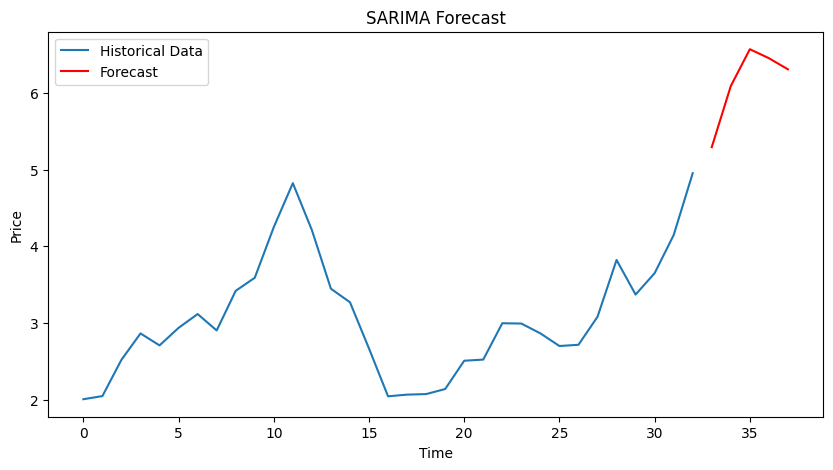

ADF Statistic: -1.5276814888381787
p-value: 0.5197759813289463


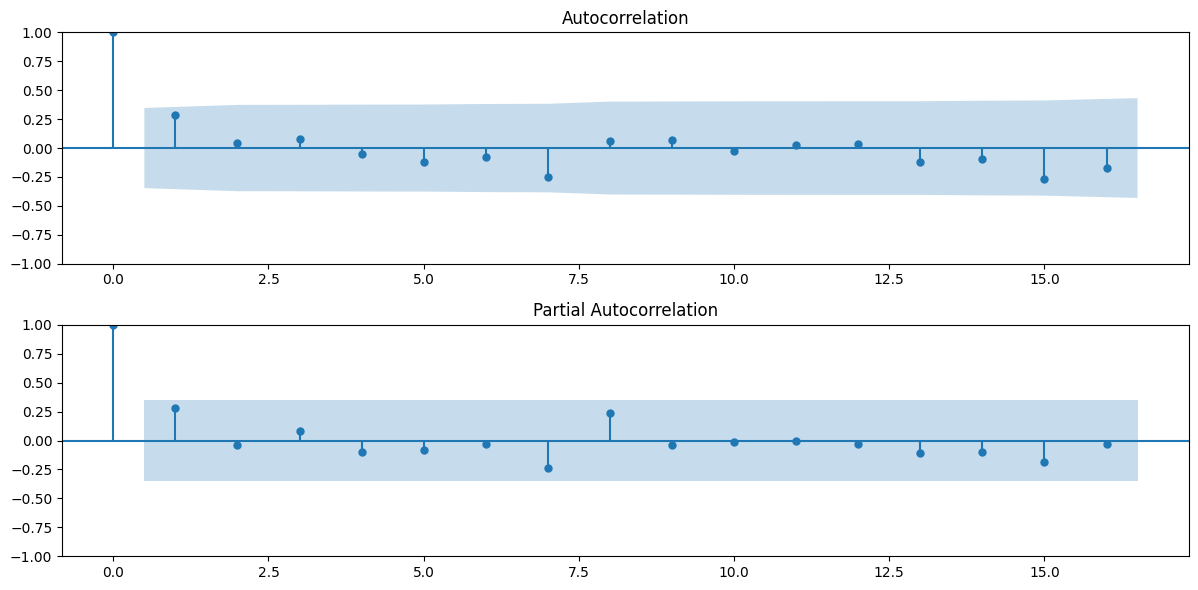

In [4]:
# train and fine tune a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
model = SARIMAX(df['Price'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust the order as needed
model_fit = model.fit(disp=False)
print(model_fit.summary())
# Forecast the next 5 time steps
forecast = model_fit.forecast(steps=5)
print(forecast)
# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(df['Price'], label='Historical Data')
plt.plot(range(len(df), len(df) + 5), forecast, label='Forecast', color='red')
plt.title('SARIMA Forecast')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# use adf to test for stationarity
result = adfuller(df['Price'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(df['Price'].diff().dropna(), lags=16, ax=ax[0])
plot_pacf(df['Price'].diff().dropna(), lags=16, ax=ax[1])
plt.tight_layout()
plt.show()
